In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [15]:
def get_results(datas, elements):
    results = {}
    for element in elements:
        for time in times:
            results[f'{element}_{time}_mean'] = []
            results[f'{element}_{time}_std'] = []
    for time in times:
        for data in datas:
            for element in elements:
                results[f'{element}_{time}_mean'].append(data[f'{element}_{time}'])
    # for time in times:
    #         for element in ['vy', 'dpsidt', 'rmse']:
    #             results[f'{element}_{time}_std'] = np.std(results[f'{element}_{time}_mean'])
    #             results[f'{element}_{time}_mean'] = np.mean(results[f'{element}_{time}_mean'])
    return results

In [46]:
# Analyse model-based

In [16]:
integration_time = [0.05, 0.5, 1.]

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
model_based_non_averaged_results = {}
for element in ['vy', 'dpsidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []
        model_based_non_averaged_results[f'{element}_{time}_mean'] = []

for i in range(3):

    training_name = f'abc_smc_{i}'
    training_parameters = f'abc_smc_model_based_{i}'
    training_folder = f"./results/training_{training_name}/"
    parameters_path = f"./training_parameters/{training_parameters}.csv"

    datas = []
    for idx in range(15):
        with open(f'./results/training_{training_name}/results/rmse_{idx}.json', 'r') as file:
            datas.append(json.load(file))
    results = get_results(datas, elements=['vy', 'dpsidt', 'rmse'])

    for time in times:
        for element in ['vy', 'dpsidt', 'rmse']:
            results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
            results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))

            model_based_non_averaged_results[f'{element}_{time}_mean'].append(results[f'{element}_{time}_mean'])
        
results_model_based = pd.DataFrame(results_)
results_model_based['Integration time'] = integration_time
results_model_based

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_6_std,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Integration time
0,0.015768,0.000375,0.054920,0.002180,0.078862,0.004437,0.099678,0.009097,0.111239,0.011898,...,0.006370,0.068871,0.006603,0.072399,0.007200,0.073799,0.007522,0.076668,0.007844,0.05
1,0.016316,0.000290,0.054560,0.001626,0.075834,0.001470,0.094934,0.003574,0.105420,0.005032,...,0.002908,0.065009,0.002973,0.068499,0.003292,0.069781,0.003457,0.072779,0.003614,0.50
2,0.017101,0.000546,0.055007,0.001963,0.073857,0.001181,0.086038,0.002279,0.093186,0.003314,...,0.002101,0.057555,0.002355,0.060227,0.002595,0.061079,0.002712,0.063452,0.002985,1.00


In [17]:
training_name = 'training_train_results'
training_parameters = 'training_parameters'
parameters_path = f"./training_parameters/{training_parameters}.csv"
parameters = pd.read_csv(parameters_path)

In [49]:
# Analyse des résultats de l'entraînement de la baseline MLP

In [18]:
nb_neurones_per_layers = [8, 16, 24]
future_temporal_horizons = [0.05, 0.5, 1.0]

nb_neurones_per_layers_list = []
future_temporal_horizons_list = []

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
for element in ['vy', 'psidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []

for future_temporal_horizon in future_temporal_horizons:
    for nb_neurones_per_layer in nb_neurones_per_layers:

        mask1 = parameters['training_name'] == 'training_data_based_dof2'
        mask2 = (parameters['nb_neurones_per_layers'] == nb_neurones_per_layer) & (parameters['future_temporal_horizon'] == future_temporal_horizon)
        mask = mask1 & mask2
        datas = []
        for idx in parameters[mask].index:
            with open(f'./results/{training_name}/results/rmse_{idx}.json', 'r') as file:
                datas.append(json.load(file))
        results = get_results(datas, elements = ['vy', 'psidt', 'rmse'])

        for time in times:
            for element in ['vy', 'psidt', 'rmse']:
                results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
                results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))
            
        nb_neurones_per_layers_list.append(nb_neurones_per_layer)
        future_temporal_horizons_list.append(future_temporal_horizon)

results_data_based = pd.DataFrame(results_)
results_data_based['Nb neurones per layers'] = nb_neurones_per_layers_list
results_data_based['Integration time'] = future_temporal_horizons_list

In [19]:
results_data_based

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Nb neurones per layers,Integration time
0,0.014776,0.000278,0.048716,0.002949,0.063586,0.004041,0.066453,0.004992,0.067978,0.005476,...,0.039743,0.002850,0.040553,0.002760,0.040853,0.002768,0.040948,0.002880,8,0.05
1,0.014428,0.000606,0.048116,0.003224,0.076056,0.018207,0.091091,0.038115,0.106724,0.049065,...,0.083013,0.072310,0.090577,0.087494,0.099192,0.104138,0.107892,0.120568,16,0.05
2,0.013816,0.000621,0.043342,0.003970,0.065990,0.022906,0.090081,0.087687,0.159602,0.330219,...,0.155582,0.413229,0.190358,0.539269,0.226988,0.669587,0.263994,0.803321,24,0.05
3,0.015452,0.000352,0.043252,0.001547,0.053089,0.002240,0.055782,0.002212,0.056450,0.001902,...,0.032138,0.001034,0.032422,0.001034,0.032367,0.001017,0.032191,0.000969,8,0.50
4,0.015069,0.000181,0.038898,0.001319,0.047497,0.002158,0.049476,0.002273,0.051154,0.001707,...,0.029684,0.000731,0.030180,0.000718,0.030266,0.000686,0.030216,0.000661,16,0.50
5,0.014648,0.000396,0.037578,0.001206,0.044830,0.001465,0.047359,0.001845,0.050037,0.001758,...,0.029040,0.000996,0.029482,0.000973,0.029613,0.000987,0.029606,0.000991,24,0.50
6,0.015981,0.000502,0.041928,0.001399,0.050368,0.001626,0.052277,0.001321,0.052659,0.001141,...,0.030133,0.000593,0.030310,0.000663,0.030353,0.000676,0.030238,0.000646,8,1.00
7,0.015215,0.000611,0.038136,0.001143,0.045186,0.001411,0.047563,0.001299,0.049252,0.001019,...,0.028524,0.000302,0.028850,0.000357,0.028907,0.000368,0.028866,0.000392,16,1.00
8,0.014814,0.000390,0.036831,0.000868,0.043308,0.001135,0.046096,0.001107,0.048599,0.001215,...,0.028198,0.000568,0.028593,0.000586,0.028677,0.000575,0.028670,0.000576,24,1.00


In [20]:
datatoplot = results_data_based[['Integration time', 'Nb neurones per layers', 'vy_10_mean', 'psidt_10_mean', 'vy_10_std', 'psidt_10_std']]
datatoplot['vy_10_mean'].values

array([0.07374525, 0.16558853, 0.44395196, 0.05760093, 0.05411619,
       0.05327695, 0.05365797, 0.05134948, 0.05115163])

In [21]:
nb_neurones_per_layers = [8, 16, 24]
future_temporal_horizons = [0.05, 0.5, 1.0]

nb_neurones_per_layers_list = []
future_temporal_horizons_list = []

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
for element in ['vy', 'psidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []

for future_temporal_horizon in future_temporal_horizons:

    if future_temporal_horizon == 1:
        print()

    for nb_neurones_per_layer in nb_neurones_per_layers:

        mask1 = parameters['training_name'] == 'training_discrepancy_dof2'
        mask2 = (parameters['nb_neurones_per_layers'] == nb_neurones_per_layer) & (parameters['future_temporal_horizon'] == future_temporal_horizon)
        mask = mask1 & mask2
        datas = []
        for idx in parameters[mask].index:
            with open(f'./results/{training_name}/results/rmse_{idx}.json', 'r') as file:
                datas.append(json.load(file))
        results = get_results(datas, elements = ['vy', 'psidt', 'rmse'])

        for time in times:
            for element in ['vy', 'psidt', 'rmse']:
                results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
                results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))
            
        nb_neurones_per_layers_list.append(nb_neurones_per_layer)
        future_temporal_horizons_list.append(future_temporal_horizon)

results_discrepancy = pd.DataFrame(results_)
results_discrepancy['Nb neurones per layers'] = nb_neurones_per_layers_list
results_discrepancy['Integration time'] = future_temporal_horizons_list
results_discrepancy

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Nb neurones per layers,Integration time
0,0.015086,0.000310,0.049100,0.002200,0.063429,0.005283,0.066437,0.006683,0.067605,0.007128,...,0.039226,0.004344,0.040195,0.004497,0.040250,0.004603,0.040191,0.004853,8,0.05
1,0.014747,0.000614,0.046303,0.002436,0.059127,0.003793,0.062158,0.004586,0.064075,0.005973,...,0.040323,0.013540,0.042657,0.019681,0.044538,0.026961,0.047468,0.038385,16,0.05
2,0.013975,0.000613,0.044871,0.002186,0.060376,0.008897,0.066622,0.016816,0.076643,0.034169,...,0.052869,0.038065,0.057422,0.047713,0.061760,0.057718,0.065883,0.067306,24,0.05
3,0.014742,0.000409,0.043532,0.001382,0.052355,0.001452,0.056713,0.002132,0.057490,0.002287,...,0.033251,0.001165,0.033806,0.001222,0.033868,0.001328,0.033824,0.001402,8,0.50
4,0.014660,0.000404,0.043147,0.002202,0.052112,0.002815,0.056867,0.003660,0.058330,0.003610,...,0.033503,0.001874,0.033891,0.001909,0.033988,0.001955,0.033943,0.001980,16,0.50
5,0.014464,0.000542,0.039086,0.001981,0.047640,0.002529,0.051667,0.003953,0.053872,0.004443,...,0.031294,0.002536,0.031629,0.002579,0.031770,0.002663,0.031847,0.002711,24,0.50
6,0.015788,0.000341,0.043327,0.001709,0.050599,0.002475,0.051935,0.002396,0.052087,0.002366,...,0.029980,0.001182,0.030180,0.001145,0.030183,0.001117,0.030018,0.001082,8,1.00
7,0.015643,0.000428,0.043414,0.002060,0.051765,0.002324,0.053265,0.002392,0.053713,0.002169,...,0.030790,0.000996,0.030921,0.000997,0.030873,0.000980,0.030753,0.000907,16,1.00
8,0.015064,0.000328,0.042775,0.002640,0.051269,0.002046,0.052821,0.001782,0.053364,0.001473,...,0.030689,0.000812,0.030928,0.000858,0.030931,0.000900,0.030836,0.000889,24,1.00


In [22]:
datatoplot = results_discrepancy[['Integration time', 'Nb neurones per layers', 'vy_10_mean', 'psidt_10_mean', 'vy_10_std', 'psidt_10_std']]
datatoplot['psidt_10_std'].values

array([0.00032002, 0.01486285, 0.03334177, 0.00016854, 0.00014071,
       0.00031016, 0.00016098, 0.00012874, 0.0002756 ])

In [23]:
nb_neurones_per_layers = [8, 16, 24]
future_temporal_horizons = [0.05, 0.5, 1.0]

nb_neurones_per_layers_list = []
future_temporal_horizons_list = []

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
for element in ['vy', 'psidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []

for future_temporal_horizon in future_temporal_horizons:
    for nb_neurones_per_layer in nb_neurones_per_layers:

        mask1 = parameters['training_name'] == 'training_transfer_learning_dof2'
        mask2 = (parameters['nb_neurones_per_layers'] == nb_neurones_per_layer) & (parameters['future_temporal_horizon'] == future_temporal_horizon)
        mask = mask1 & mask2
        datas = []
        for idx in parameters[mask].index:
            with open(f'./results/{training_name}/results/rmse_{idx}.json', 'r') as file:
                datas.append(json.load(file))
        results = get_results(datas, elements = ['vy', 'psidt', 'rmse'])

        for time in times:
            for element in ['vy', 'psidt', 'rmse']:
                results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
                results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))
            
        nb_neurones_per_layers_list.append(nb_neurones_per_layer)
        future_temporal_horizons_list.append(future_temporal_horizon)

results_transfer_learning_dof2 = pd.DataFrame(results_)
results_transfer_learning_dof2['Nb neurones per layers'] = nb_neurones_per_layers_list
results_transfer_learning_dof2['Integration time'] = future_temporal_horizons_list
results_transfer_learning_dof2

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Nb neurones per layers,Integration time
0,0.014510,0.000240,0.047121,0.001706,0.060598,0.002673,0.062396,0.003058,0.064721,0.004246,...,0.038157,0.002573,0.039058,0.002723,0.039737,0.003237,0.040341,0.004681,8,0.05
1,0.013712,0.000309,0.041201,0.002037,0.055748,0.014348,0.065841,0.037776,0.084260,0.083279,...,0.066093,0.087636,0.077208,0.113760,0.089073,0.141953,0.100456,0.169425,16,0.05
2,0.013154,0.000335,0.041212,0.003077,0.052296,0.004885,0.055577,0.004698,0.058830,0.005315,...,0.034513,0.004768,0.034988,0.005266,0.035977,0.006022,0.036421,0.006677,24,0.05
3,0.015158,0.000333,0.040326,0.001795,0.049228,0.002409,0.051124,0.002471,0.052560,0.002208,...,0.030095,0.001078,0.030501,0.001071,0.030500,0.000973,0.030353,0.000917,8,0.50
4,0.014366,0.000547,0.035550,0.000959,0.042468,0.001359,0.046690,0.001583,0.049216,0.001343,...,0.028580,0.000778,0.028847,0.000752,0.029047,0.000711,0.029120,0.000697,16,0.50
5,0.013194,0.000710,0.034815,0.000817,0.041186,0.001201,0.045057,0.001855,0.047937,0.001926,...,0.027650,0.001169,0.027948,0.001109,0.028232,0.001075,0.028360,0.001058,24,0.50
6,0.015861,0.000316,0.039759,0.001945,0.047513,0.002355,0.049448,0.002044,0.050595,0.001740,...,0.028835,0.000991,0.029070,0.000906,0.029115,0.000845,0.029029,0.000811,8,1.00
7,0.014865,0.000426,0.035324,0.001082,0.041623,0.001613,0.045954,0.001769,0.048558,0.001467,...,0.027846,0.000689,0.028204,0.000639,0.028350,0.000586,0.028363,0.000551,16,1.00
8,0.014379,0.000485,0.035187,0.001154,0.040947,0.001518,0.045416,0.001608,0.048096,0.001197,...,0.027593,0.000623,0.027858,0.000651,0.027988,0.000634,0.028005,0.000605,24,1.00


In [24]:
datatoplot = results_transfer_learning_dof2[['Integration time', 'Nb neurones per layers', 'vy_10_mean', 'psidt_10_mean', 'vy_10_std', 'psidt_10_std']]
datatoplot['vy_10_mean'].values

array([0.07114487, 0.18717171, 0.06528065, 0.0542893 , 0.05245169,
       0.05086608, 0.05177958, 0.0509404 , 0.05022227])

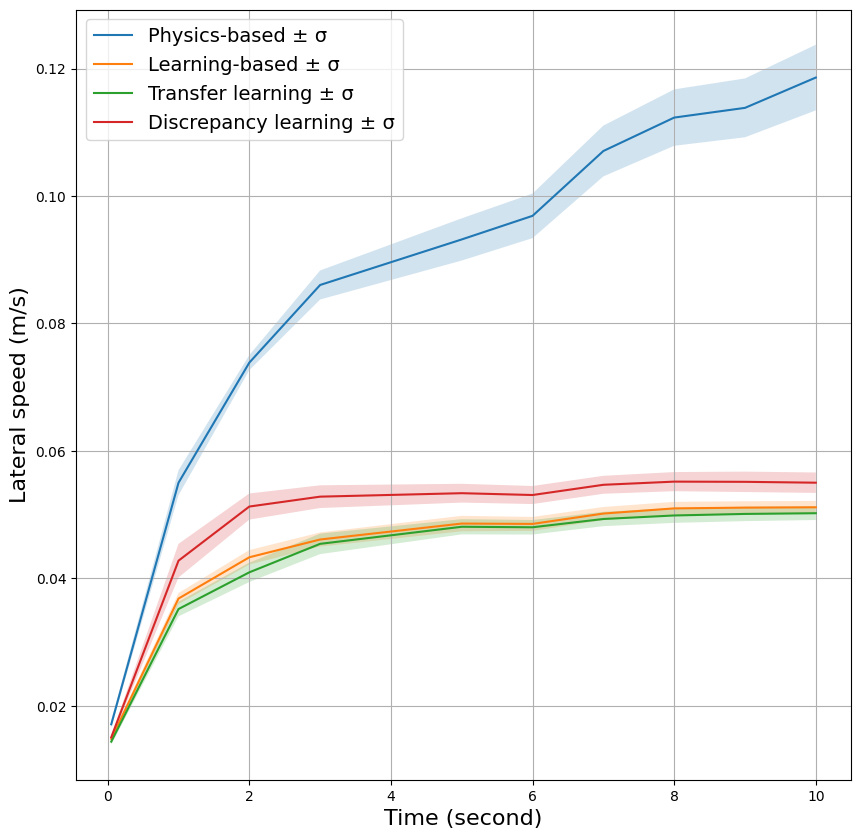

In [25]:
element = 'vy'
plt.figure(figsize = (10, 10))

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_model_based.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_model_based.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Physics-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_data_based.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_data_based.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Learning-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Transfer learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_discrepancy.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_discrepancy.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Discrepancy learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

plt.grid()
# plt.title('RMSE Evolution over time')
plt.legend(fontsize=14)
plt.xlabel('Time (second)', fontsize=16)
plt.ylabel('Lateral speed (m/s)', fontsize=16)
# plt.show()
plt.savefig('./figures/RMSE_over_time_vy.pdf')

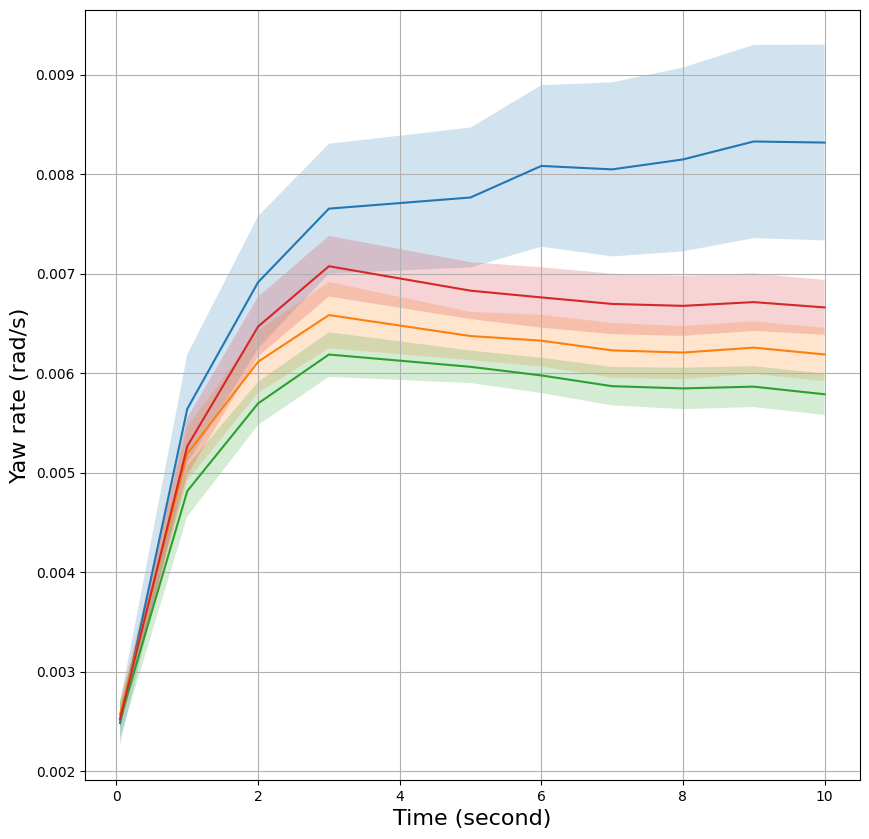

In [26]:
element = 'psidt'
plt.figure(figsize = (10, 10))

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_model_based.iloc[-1][f'd{element}_{time}_mean'])
    val_std.append(results_model_based.iloc[-1][f'd{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Physics-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_data_based.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_data_based.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Learning-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Transfer learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_discrepancy.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_discrepancy.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Discrepancy learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

plt.grid()
# plt.title('RMSE Evolution over time')
# plt.legend()
plt.xlabel('Time (second)', fontsize=16)
plt.ylabel('Yaw rate (rad/s)', fontsize=16)
# plt.show()
plt.savefig('./figures/RMSE_over_time_psidt.pdf')

In [28]:
from utils import open_json, split_data, data_preprocessing_
import os
from tqdm import tqdm

parameter = './results/training_train_results/training_config_0.json'
config = open_json(parameter)

in_variables = config['in_states_variables']
out_variables = config['out_states_variables']
control_variables = config['control_variables']

seed = 43
nb_trajectories = 172
shuffle = True
train_set_pct = 0.5
val_set_pct = 0.3
data_dt = 0.005
subsampling_dt = 0.05

np.random.seed(43)

dataset_choice = 'february_2024'

# if dataset_choice == 'february_2024':
# else:
#     data_path = f'./data/duffing_oscillator/'

data_path = f'./data/february_2024_bis/final/'

data_list = []
for filename in tqdm(os.listdir(f'{data_path}')):
    data_list.append(pd.read_csv(f'{data_path}{filename}'))

(train_data_list, train_trajectories_idx, 
    val_data_list, val_trajectories_idx, 
    test_data_list, test_trajectories_idx) = split_data(data_list, nb_trajectories, shuffle, train_set_pct, val_set_pct)

100%|██████████| 173/173 [00:00<00:00, 179.31it/s]


In [29]:
test_in_state, test_in_control, test_out_state, test_out_control = data_preprocessing_(
            data_list = test_data_list.copy(),
            data_dt = data_dt,
            subsampling_dt = subsampling_dt,
            state_variables = in_variables,
            out_variables = out_variables,
            control_variables = control_variables,
            differentiate = False,
            smoothing = False,
            smoothing_parameters = {}
        )

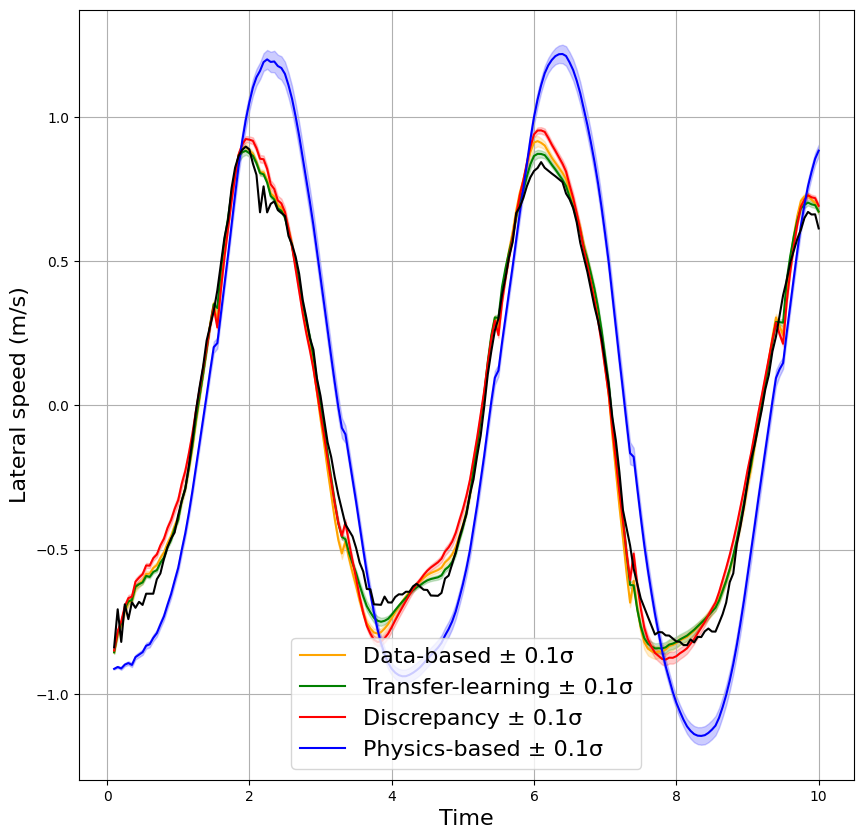

<Figure size 640x480 with 0 Axes>

In [32]:
import torch
from nn_architecture import Mlp_narx, discrepancy, TorchDOF2

len_trajectories = 10
device = 'cuda'

nb_neurones_per_layer = 24
future_temporal_horizon = 1.
nb_hidden_layer = 4
activation = 'tanh'
traj_idx = 19
prior_parameters_path = './nn_architecture/parameters.json'

colors = ['orange', 'green', 'red', 'blue']
methods = ['Data-based ± 0.1σ', 'Transfer-learning ± 0.1σ', 'Discrepancy ± 0.1σ', 'Physics-based ± 0.1σ']
#traj_idx = 19
#traj_idx = 18
plt.figure(figsize = (10, 10))
times = np.arange(2, 201, 1) * subsampling_dt
for _, method in enumerate(['training_data_based_dof2', 'training_transfer_learning_dof2', 'training_discrepancy_dof2', 'model_based']):

    if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2' or method == 'training_discrepancy_dof2':
        mask1 = parameters['training_name'] == method
        mask2 = parameters['nb_neurones_per_layers'] == nb_neurones_per_layer
        mask3 = parameters['future_temporal_horizon'] == future_temporal_horizon
        mask = mask1 & mask2 & mask3
        training_indexes = parameters[mask].index
    else:
        training_indexes = range(15)

    datas = []
    for training_idx in training_indexes:

        data_dt = parameters.iloc[idx]['data_dt']
        subsampling_dt = parameters.iloc[idx]['subsampling_dt']

        if method == 'training_discrepancy_dof2':
            model = discrepancy(
                input_size = len(in_variables) + len(control_variables),
                nb_hidden_layer = nb_hidden_layer,
                nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                output_size = len(in_variables),
                activation = activation,
                sequence_duration = data_dt,
                dt = subsampling_dt,
                delay = data_dt,
                parameter_path = prior_parameters_path)
            model.load_state_dict(torch.load(f'./results/training_train_results/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2':
            model = Mlp_narx(
                            input_size = len(in_variables) + len(control_variables),
                            nb_hidden_layer = nb_hidden_layer,
                            nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                            output_size = len(in_variables),
                            activation = activation,
                            sequence_duration=data_dt,
                            dt = subsampling_dt,
                            delay = data_dt 
                        )
            model.load_state_dict(torch.load(f'./results/training_train_results/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'model_based':
            model = TorchDOF2(
                parameters_path = prior_parameters_path, 
                dt = subsampling_dt,
                output_format = 'speed',
                seed=training_idx)
            model.load_state_dict(torch.load(f'./results/training_abc_smc_2/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()

        nb_test_trajectories = len(test_in_state)
        sequence_duration = 10
        s = 0
        nb_step = int(len_trajectories / subsampling_dt) - 1 - s

        X_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(in_variables))).to(device)
        U_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(control_variables))).to(device)
        X_out_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
        X_predictions_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
            
        # Fill tensor test_in_state, test_in_control, test_out_state
        for idx, (X_in, X_out, U_in) in enumerate(zip(test_in_state, test_out_state, test_in_control)):
            X_in_tensor[idx] = torch.tensor(X_in[s:])
            X_out_tensor[idx] = torch.tensor(X_out[s:])
            U_in_tensor[idx] = torch.tensor(U_in[s:])
            
        pred = X_in_tensor[: ,0] + model(X_in_tensor[: ,0], U_in_tensor[:, 0])
        X_predictions_tensor[:, 0, :] = pred.clone()
        for step in range(1, nb_step):
            pred = pred + model(pred, U_in_tensor[:, step])
            X_predictions_tensor[:, step, :] = pred.clone()

        datas.append(X_predictions_tensor[traj_idx, :, 0].detach().cpu().numpy())
        
    datas = np.asarray(datas)
    mean = datas.mean(axis=0)
    std = datas.std(axis=0)

    plt.plot(times, mean, colors[_], label=methods[_])

    upper_bound = mean + std * 0.5
    lower_bound = mean - std * 0.5
    plt.fill_between(times, lower_bound, upper_bound, alpha=0.2, color=colors[_])

plt.plot(times, X_out_tensor[traj_idx, :, 0].detach().cpu().numpy(), 'black', alpha=1)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Lateral speed (m/s)', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
plt.show()
plt.savefig('./figures/lateral_speed_trajectory.pdf')

/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/nn_architecture/architecture.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('std', torch.tensor(torch.tensor([[1] * self.output_size]).float()))
/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/nn_architecture/vehicle_architecture.py:238: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_parameter(name=name, param=torch.nn.Parameter(torch.tensor(value).unsqueeze(dim=0).float(), requires_grad=requires_grad))
/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/nn_architecture/vehicle_architecture.py:362: UserWarning: To copy construct from a tensor, it is recommended t

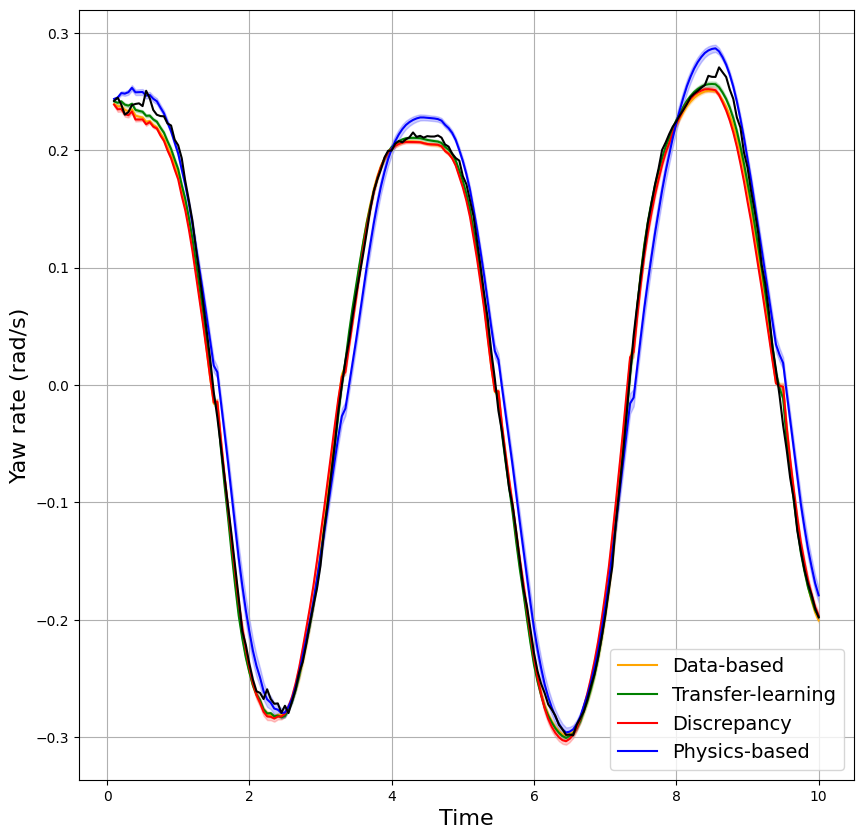

<Figure size 640x480 with 0 Axes>

In [40]:
import torch
from nn_architecture import Mlp_narx, discrepancy, TorchDOF2

len_trajectories = 10
device = 'cuda'

nb_neurones_per_layer = 24
future_temporal_horizon = 1.
nb_hidden_layer = 4
activation = 'tanh'
traj_idx = 19
prior_parameters_path = './nn_architecture/parameters.json'

colors = ['orange', 'green', 'red', 'blue']
methods = ['Data-based', 'Transfer-learning', 'Discrepancy', 'Physics-based']
#traj_idx = 19
#traj_idx = 18
plt.figure(figsize = (10, 10))
times = np.arange(2, 201, 1) * subsampling_dt
for _, method in enumerate(['training_data_based_dof2', 'training_transfer_learning_dof2', 'training_discrepancy_dof2', 'model_based']):

    if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2' or method == 'training_discrepancy_dof2':
        mask1 = parameters['training_name'] == method
        mask2 = parameters['nb_neurones_per_layers'] == nb_neurones_per_layer
        mask3 = parameters['future_temporal_horizon'] == future_temporal_horizon
        mask = mask1 & mask2 & mask3
        training_indexes = parameters[mask].index
    else:
        training_indexes = range(15)

    datas = []
    for training_idx in training_indexes:

        data_dt = parameters.iloc[idx]['data_dt']
        subsampling_dt = parameters.iloc[idx]['subsampling_dt']

        if method == 'training_discrepancy_dof2':
            model = discrepancy(
                input_size = len(in_variables) + len(control_variables),
                nb_hidden_layer = nb_hidden_layer,
                nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                output_size = len(in_variables),
                activation = activation,
                sequence_duration = data_dt,
                dt = subsampling_dt,
                delay = data_dt,
                parameter_path = prior_parameters_path)
            model.load_state_dict(torch.load(f'./results/training_physics_informed_bis/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2':
            model = Mlp_narx(
                            input_size = len(in_variables) + len(control_variables),
                            nb_hidden_layer = nb_hidden_layer,
                            nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                            output_size = len(in_variables),
                            activation = activation,
                            sequence_duration=data_dt,
                            dt = subsampling_dt,
                            delay = data_dt 
                        )
            model.load_state_dict(torch.load(f'./results/training_physics_informed_bis/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'model_based':
            model = TorchDOF2(
                parameters_path = prior_parameters_path, 
                dt = subsampling_dt,
                output_format = 'speed',
                seed=training_idx)
            model.load_state_dict(torch.load(f'./results/training_abc_smc_2/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()

        nb_test_trajectories = len(test_in_state)
        sequence_duration = 10
        s = 0
        nb_step = int(len_trajectories / subsampling_dt) - 1 - s

        X_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(in_variables))).to(device)
        U_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(control_variables))).to(device)
        X_out_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
        X_predictions_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
            
        # Fill tensor test_in_state, test_in_control, test_out_state
        for idx, (X_in, X_out, U_in) in enumerate(zip(test_in_state, test_out_state, test_in_control)):
            X_in_tensor[idx] = torch.tensor(X_in[s:])
            X_out_tensor[idx] = torch.tensor(X_out[s:])
            U_in_tensor[idx] = torch.tensor(U_in[s:])
            
        pred = X_in_tensor[: ,0] + model(X_in_tensor[: ,0], U_in_tensor[:, 0])
        X_predictions_tensor[:, 0, :] = pred.clone()
        for step in range(1, nb_step):
            pred = pred + model(pred, U_in_tensor[:, step])
            X_predictions_tensor[:, step, :] = pred.clone()

        datas.append(X_predictions_tensor[traj_idx, :, 1].detach().cpu().numpy())
        
    datas = np.asarray(datas)
    mean = datas.mean(axis=0)
    std = datas.std(axis=0)

    plt.plot(times, mean, colors[_], label=methods[_])

    upper_bound = mean + std * 0.5
    lower_bound = mean - std * 0.5
    plt.fill_between(times, lower_bound, upper_bound, alpha=0.2, color=colors[_])

plt.plot(times, X_out_tensor[traj_idx, :, 1].detach().cpu().numpy(), 'black', alpha=1)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Yaw rate (rad/s)', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
plt.show()
plt.savefig('./figures/yaw_rate_trajectory.pdf')